In [2]:
import numpy as np
import tensorflow as tf 
import matplotlib.pyplot as plt
import time

C:\Users\secie\Anaconda3\envs\tensorflow_gpu\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
path_input_vol = "E:/dataset_tesis/np_dataset_vol.npy"
path_input_lbl = "E:/dataset_tesis/np_dataset_lbl.npy"

In [3]:
dataset_vol = np.load(path_input_vol)
dataset_lbl = np.load(path_input_lbl)

In [4]:
print("Volumes data size: \n",dataset_vol.shape)
print("Labels data size: \n",dataset_lbl.shape)

Volumes data size: 
 (13455, 32768)
Labels data size: 
 (13455, 1)


In [5]:
dataset_lbl = dataset_lbl[:,0]
print(dataset_lbl)

[9 4 3 ... 6 9 4]


Training images size: 
 (10764, 32768)
Test images size: 
 (2691, 32768)
Training labels size: 
 (10764, 14)
Test labels size: 
 (2691, 14)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


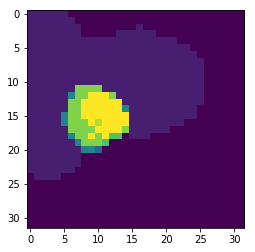

In [6]:
vol_training = dataset_vol[0:int(0.8*len(dataset_vol))]
vol_test = dataset_vol[int(0.8*len(dataset_vol)):]

#------One hot encoding creation -----------
one_hot_encoding = np.zeros((len(dataset_lbl),14))
one_hot_encoding[np.arange(len(dataset_lbl)), dataset_lbl] = 1
#print(dataset_lbl[0:2])
#print(one_hot_encoding[0])

lbl_training = one_hot_encoding[0:int(0.8*len(one_hot_encoding))]
lbl_test = one_hot_encoding[int(0.8*len(one_hot_encoding)):]

print("Training images size: \n",vol_training.shape)
print("Test images size: \n",vol_test.shape)

print("Training labels size: \n",lbl_training.shape)
print("Test labels size: \n",lbl_test.shape)

indice = 10000
slide = 0
vol_slide = np.reshape(vol_training[indice],(32,32,32))
vol_slide = vol_slide[:][:][slide]

plt.imshow(vol_slide)

print(lbl_training[0:5])


In [7]:
def reset_graph():
    if 'sess' in globals() and sess:
        sess.close()
    tf.reset_default_graph()

In [8]:
def mini_red(x, n_classes = 14 ):
    mu = 0
    sigma = 0.1
    #limpiar graficas anteriores
    #reset_graph()
    
    #Imagenes 
    img = tf.reshape(x, shape=[-1, 32,32,32])
    #tf.summary.image("Image", img)
    # Declarando las variables 
    weights = {'W_conv1':tf.Variable(tf.truncated_normal([7,7,3,4], mean = mu, stddev = sigma)),
               'W_conv2':tf.Variable(tf.truncated_normal([5,5,4,5], mean = mu, stddev = sigma)),
               'W_fc1':tf.Variable(tf.truncated_normal([32*32*32,1500], mean = mu, stddev = sigma)),
               'W_fc2':tf.Variable(tf.truncated_normal([1500, 750], mean = mu, stddev = sigma)),
               'W_fc3':tf.Variable(tf.truncated_normal([750, 100], mean = mu, stddev = sigma)),
               'W_fc4':tf.Variable(tf.truncated_normal([100,50], mean= mu, stddev= sigma)),
               'out':tf.Variable(tf.truncated_normal([50, n_classes], mean = mu, stddev = sigma))}

    biases = {'b_conv1':tf.Variable(tf.random_normal([4])),
              'b_conv2':tf.Variable(tf.random_normal([5])),
              'b_fc1':tf.Variable(tf.random_normal([1500])),
              'b_fc2':tf.Variable(tf.random_normal([750])),
              'b_fc3':tf.Variable(tf.random_normal([100])),
              'b_fc4':tf.Variable(tf.random_normal([50])),
              'out':tf.Variable(tf.random_normal([n_classes]))}
   
    
    
    # Declarando la arquitectura
    
    #Input: 200x200x3     Output: 50x50x3
    #l1 = tf.nn.conv2d(img, weights['W_conv1'], strides=[1,2,2,1], padding='SAME')
    #l1 = tf.add(l1, biases['b_conv1'])
    #l1 = tf.nn.relu(l1)
    #l1 = tf.nn.dropout(l1, keep_rate2)
    #l1 = tf.nn.max_pool(l1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')
    
    #Input: 50x50x3     Output: 50x50x6
    #l2 = tf.nn.conv2d(l1, weights['W_conv2'], strides=[1,1,1,1], padding='SAME')
    #l2 = tf.add(l2, biases['b_conv2'])
    #l2 = tf.nn.relu(l2)
    #l2 = tf.nn.dropout(l2, keep_rate2)
    
    #Input: 50x50x6     Output: 25x25x6
    #l2 = tf.nn.max_pool(l2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')
    #print(l2.shape)
    
    
    #Input: 6x6x8     Output: 128
    #fc1 = tf.reshape(l2, [-1, 25*25*5])
    fc1 = tf.nn.relu(tf.matmul(x, weights['W_fc1'])+biases['b_fc1'])
    fc1 = tf.nn.dropout(fc1, keep_rate)
                          
    #Input: 128     Output: 64
    fc2 = tf.nn.relu(tf.matmul(fc1, weights['W_fc2'])+biases['b_fc2'])
    fc2 = tf.nn.dropout(fc2, keep_rate)
    
    fc3 = tf.nn.relu(tf.matmul(fc2, weights['W_fc3'])+biases['b_fc3'])
    fc3 = tf.nn.dropout(fc3, keep_rate)
    
    fc4 = tf.nn.relu(tf.matmul(fc3, weights['W_fc4'])+biases['b_fc4'])
    fc4 = tf.nn.dropout(fc4, keep_rate)

    output_ = tf.matmul(fc4, weights['out'])+biases['out']

    # Declarando la funcion de costo y entrenamiento
    #cost = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits(logits=output, labels=y) )
    #optimizer = tf.train.AdamOptimizer(0.0001).minimize(cost)
    
    #almacenar costo
    #tf.summary.scalar("costo", cost)
    #generar logs
    #summaries = tf.summary.merge_all()
    
    return output_

In [9]:
def voxnet(x, n_classes = 14 ):
    mu = 0
    sigma = 0.1
    #limpiar graficas anteriores
    #reset_graph()
    
    #Imagenes 
    img = tf.reshape(x, shape=[-1, 32,32,32,1])
    #tf.summary.image("Image", img)
    # Declarando las variables 
    weights = {'W_conv1':tf.Variable(tf.truncated_normal([5,5,5,1,32], mean = mu, stddev = sigma)),
               'W_conv2':tf.Variable(tf.truncated_normal([3,3,3,32,32], mean = mu, stddev = sigma)),
               'W_conv3':tf.Variable(tf.truncated_normal([3,3,3,12,8], mean = mu, stddev = sigma)),
               'W_fc1':tf.Variable(tf.truncated_normal([8*8*8*32,128], mean = mu, stddev = sigma)),
               'W_fc2':tf.Variable(tf.truncated_normal([1500, 500], mean = mu, stddev = sigma)),
               'W_fc3':tf.Variable(tf.truncated_normal([500, 100], mean = mu, stddev = sigma)),
               'W_fc4':tf.Variable(tf.truncated_normal([100,50], mean= mu, stddev= sigma)),
               'out':tf.Variable(tf.truncated_normal([128, n_classes], mean = mu, stddev = sigma))}

    biases = {'b_conv1':tf.Variable(tf.random_normal([32])),
              'b_conv2':tf.Variable(tf.random_normal([32])),
              'b_conv3':tf.Variable(tf.random_normal([8])),
              'b_fc1':tf.Variable(tf.random_normal([128])),
              'b_fc2':tf.Variable(tf.random_normal([500])),
              'b_fc3':tf.Variable(tf.random_normal([100])),
              'b_fc4':tf.Variable(tf.random_normal([50])),
              'out':tf.Variable(tf.random_normal([n_classes]))}
   
    
    
    # Declarando la arquitectura
    
    #Input: 200x200x3     Output: 50x50x3
    l1 = tf.nn.conv3d(img, weights['W_conv1'], strides=[1,2,2,2,1], padding='SAME')
    l1 = tf.add(l1, biases['b_conv1'])
    l1 = tf.nn.relu(l1)
    print("l1: ",l1.shape)
    #l1 = tf.nn.dropout(l1, keep_rate2)
    #l1 = tf.nn.max_pool3d(l1, ksize=[1,2,2,2,1], strides=[1,2,2,2,1], padding='VALID')
    
    #Input: 50x50x3     Output: 50x50x6
    l2 = tf.nn.conv3d(l1, weights['W_conv2'], strides=[1,1,1,1,1], padding='SAME')
    l2 = tf.add(l2, biases['b_conv2'])
    l2 = tf.nn.relu(l2)
    #l2 = tf.nn.dropout(l2, keep_rate2)
    #print(l2)
    
    #Input: 50x50x6     Output: 25x25x6
    l2 = tf.nn.max_pool3d(l2, ksize=[1,2,2,2,1], strides=[1,2,2,2,1], padding='VALID')
    print("l2: ",l2.shape)
    
    #l3 = tf.nn.conv3d(l2, weights['W_conv3'], strides=[1,1,1,1,1], padding='SAME')
    #l3= tf.add(l3, biases['b_conv3'])
    #l3 = tf.nn.relu(l3)
    #l2 = tf.nn.dropout(l2, keep_rate2)
    #print(l2)
    
    #Input: 50x50x6     Output: 25x25x6
    #l3 = tf.nn.max_pool3d(l3, ksize=[1,2,2,2,1], strides=[1,2,2,2,1], padding='VALID')
    #print(l3.shape)
    
    
    #Input: 6x6x8     Output: 128
    fc1 = tf.reshape(l2, [-1, 8*8*8*32])
    fc1 = tf.nn.relu(tf.matmul(fc1, weights['W_fc1'])+biases['b_fc1'])
    fc1 = tf.nn.dropout(fc1, keep_rate)
                          
    #Input: 128     Output: 64
    #fc2 = tf.nn.relu(tf.matmul(fc1, weights['W_fc2'])+biases['b_fc2'])
    #fc2 = tf.nn.dropout(fc2, keep_rate)
    
    #fc3 = tf.nn.relu(tf.matmul(fc2, weights['W_fc3'])+biases['b_fc3'])
    #fc3 = tf.nn.dropout(fc3, keep_rate)
    
    #fc4 = tf.nn.relu(tf.matmul(fc3, weights['W_fc4'])+biases['b_fc4'])
    #fc4 = tf.nn.dropout(fc4, keep_rate)

    output_ = tf.matmul(fc1, weights['out'])+biases['out']

    # Declarando la funcion de costo y entrenamiento
    #cost = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits(logits=output, labels=y) )
    #optimizer = tf.train.AdamOptimizer().minimize(cost)
    
    #almacenar costo
    #tf.summary.scalar("costo", cost)
    #generar logs
    #summaries = tf.summary.merge_all()
    
    return output_

In [10]:
def red_3d(x, n_classes = 14 ):
    mu = 0
    sigma = 0.1
    #limpiar graficas anteriores
    #reset_graph()  
    #Imagenes 
    img = tf.reshape(x, shape=[-1, 32,32,32,1])
    #tf.summary.image("Image", img)
    # Declarando las variables 
    weights = {'W_conv1':tf.Variable(tf.truncated_normal([3,3,3,1,10], mean = mu, stddev = sigma)),
               'W_conv2':tf.Variable(tf.truncated_normal([3,3,3,10,12], mean = mu, stddev = sigma)),
               'W_conv3':tf.Variable(tf.truncated_normal([3,3,3,12,8], mean = mu, stddev = sigma)),
               'W_fc1':tf.Variable(tf.truncated_normal([4*4*4*8,1500], mean = mu, stddev = sigma)),
               'W_fc2':tf.Variable(tf.truncated_normal([1500, 500], mean = mu, stddev = sigma)),
               'W_fc3':tf.Variable(tf.truncated_normal([500, 100], mean = mu, stddev = sigma)),
               'W_fc4':tf.Variable(tf.truncated_normal([100,50], mean= mu, stddev= sigma)),
               'out':tf.Variable(tf.truncated_normal([50, n_classes], mean = mu, stddev = sigma))}

    biases = {'b_conv1':tf.Variable(tf.random_normal([10])),
              'b_conv2':tf.Variable(tf.random_normal([12])),
              'b_conv3':tf.Variable(tf.random_normal([8])),
              'b_fc1':tf.Variable(tf.random_normal([1500])),
              'b_fc2':tf.Variable(tf.random_normal([500])),
              'b_fc3':tf.Variable(tf.random_normal([100])),
              'b_fc4':tf.Variable(tf.random_normal([50])),
              'out':tf.Variable(tf.random_normal([n_classes]))}
   
    
    
    # Declarando la arquitectura
    
    #Input: 200x200x3     Output: 50x50x3
    l1 = tf.nn.conv3d(img, weights['W_conv1'], strides=[1,1,1,1,1], padding='SAME')
    l1 = tf.add(l1, biases['b_conv1'])
    l1 = tf.nn.relu(l1)
    print(l1.shape)
    #l1 = tf.nn.dropout(l1, keep_rate2)
    l1 = tf.nn.max_pool3d(l1, ksize=[1,2,2,2,1], strides=[1,2,2,2,1], padding='VALID')
    
    #Input: 50x50x3     Output: 50x50x6
    l2 = tf.nn.conv3d(l1, weights['W_conv2'], strides=[1,1,1,1,1], padding='SAME')
    l2 = tf.add(l2, biases['b_conv2'])
    l2 = tf.nn.relu(l2)
    #l2 = tf.nn.dropout(l2, keep_rate2)
    #print(l2)
    
    #Input: 50x50x6     Output: 25x25x6
    l2 = tf.nn.max_pool3d(l2, ksize=[1,2,2,2,1], strides=[1,2,2,2,1], padding='VALID')
    print(l2.shape)
    
    l3 = tf.nn.conv3d(l2, weights['W_conv3'], strides=[1,1,1,1,1], padding='SAME')
    l3= tf.add(l3, biases['b_conv3'])
    l3 = tf.nn.relu(l3)
    l3 = tf.nn.dropout(l3, keep_rate)
    #print(l2)
    
    #Input: 50x50x6     Output: 25x25x6
    l3 = tf.nn.max_pool3d(l3, ksize=[1,2,2,2,1], strides=[1,2,2,2,1], padding='VALID')
    print(l3.shape)
    
    
    #Input: 6x6x8     Output: 128
    fc1 = tf.reshape(l3, [-1, 4*4*4*8])
    fc1 = tf.nn.relu(tf.matmul(fc1, weights['W_fc1'])+biases['b_fc1'])
    #fc1 = tf.nn.dropout(fc1, keep_rate)
                          
    #Input: 128     Output: 64
    fc2 = tf.nn.relu(tf.matmul(fc1, weights['W_fc2'])+biases['b_fc2'])
    fc2 = tf.nn.dropout(fc2, keep_rate)
    
    fc3 = tf.nn.relu(tf.matmul(fc2, weights['W_fc3'])+biases['b_fc3'])
    fc3 = tf.nn.dropout(fc3, keep_rate)
    
    fc4 = tf.nn.relu(tf.matmul(fc3, weights['W_fc4'])+biases['b_fc4'])
    fc4 = tf.nn.dropout(fc4, keep_rate)

    output_ = tf.matmul(fc4, weights['out'])+biases['out']
    
    #almacenar costo
    #tf.summary.scalar("costo", cost)
    #generar logs
    #summaries = tf.summary.merge_all()
    
    return output_
        #saver = tf.train.Saver()

In [11]:
# Declarando las entradas y salidas
x=tf.placeholder('float',[None,32*32*32])
y=tf.placeholder('float')
keep_rate = tf.placeholder(tf.float32)
output = voxnet(x)#################################

cost = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits(logits=output, labels=y))
optimizer = tf.train.AdamOptimizer().minimize(cost)

correct = tf.equal(tf.argmax(output, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct, 'float'))

l1:  (?, 16, 16, 16, 32)
l2:  (?, 8, 8, 8, 32)
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [12]:
red_3d(x)

(?, 32, 32, 32, 10)
(?, 8, 8, 8, 12)
(?, 4, 4, 4, 8)


<tf.Tensor 'add_6:0' shape=(?, 14) dtype=float32>

In [13]:
def evaluate(x_data, y_data, eval_batch_size):
    sess = tf.get_default_session()
    eval_i = 0
    total_acc = 0
    count = 0
    for _ in range(int(len(x_data)/eval_batch_size)):
        eval_x = x_data[eval_i:eval_i + eval_batch_size]
        eval_y = y_data[eval_i:eval_i + eval_batch_size]
        eval_accu = sess.run(accuracy, feed_dict = {x:eval_x, y:eval_y, keep_rate: 1})
        total_acc += eval_accu
        eval_i = eval_i + eval_batch_size
        count = count  + 1
    total_acc = total_acc / count 
    return total_acc

In [14]:
def train_nn(epochs = 600, batch_size = 100, save = False):
    saver = tf.train.Saver()
    start_time = time.time()
    train_accuracy = []
    test_accuracy = []
    epoch_loss_ = []
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        #writer = tf.summary.FileWriter("./Octree_logs")
        #tf.summary.FileWriter.add_graph(writer,sess.graph)
        #writer.add_graph(sess.graph)
        i_prin = 0
        for epoch in range(epochs):
            epoch_loss = 0
            i = 0
            for _ in range(int(len(vol_training)/batch_size)):
                epoch_x = vol_training[i:i+batch_size]
                epoch_y = lbl_training[i:i+batch_size]
                #feed_dict={DNN["x"]: epoch_x,DNN["y"]: epoch_y}
                sess.run(optimizer ,feed_dict={x: epoch_x, y: epoch_y, keep_rate: 0.7})
                c = sess.run(cost, feed_dict = {x: epoch_x, y: epoch_y, keep_rate: 1})
                epoch_loss += c
                i =i+batch_size
            
            epoch_loss_.append(epoch_loss)
            train_accuracy.append(evaluate(vol_training, lbl_training, batch_size))
            test_accuracy.append(evaluate(vol_test, lbl_test, batch_size))
            
            #tf.summary.scalar('loss',epoch_loss)
            #tf.summary.scalar("train_accuracy",train_accuracy)
            #tf.summary.scalar("test_accuracy",test_accuracy)
            #summ = tf.summary.merge_all()
            
            if (epoch%20 == 0):
                pass
                #writer.add_summary(epoch_loss, epoch).eval()
            if (epoch%50 ==0):
                if isinstance(save, bool):
                    ENCname="./SVEoctree/"+str(epoch)+".ckpt"
                    saver.save(sess, ENCname)

            print("Epoch: ", epoch, "Error: ", epoch_loss_[i_prin])
            print("Train accuracy \t \t", train_accuracy[i_prin])
            print("Test accuracy \t \t", test_accuracy[i_prin])
            i_prin = i_prin + 1

    print("--- %s seconds ---" % (time.time() - start_time))
    return train_accuracy, test_accuracy, epoch_loss_

In [15]:
train_accuracy, test_accuracy, epoch_loss = train_nn(400, 200, True)

Epoch:  0 Error:  164.96655988693237
Train accuracy 	 	 0.19660377277518218
Test accuracy 	 	 0.1842307700560643
Epoch:  1 Error:  126.37385702133179
Train accuracy 	 	 0.23518867846929803
Test accuracy 	 	 0.22153845658669105
Epoch:  2 Error:  120.16008234024048
Train accuracy 	 	 0.25622641281136926
Test accuracy 	 	 0.23884614958212927
Epoch:  3 Error:  113.43388795852661
Train accuracy 	 	 0.31603773641136457
Test accuracy 	 	 0.30153845938352436
Epoch:  4 Error:  108.32438588142395
Train accuracy 	 	 0.31537735771458103
Test accuracy 	 	 0.3134615352520576
Epoch:  5 Error:  105.49310100078583
Train accuracy 	 	 0.3506603775159368
Test accuracy 	 	 0.33538461648500884
Epoch:  6 Error:  102.05829417705536
Train accuracy 	 	 0.37575471682368583
Test accuracy 	 	 0.3650000003667978
Epoch:  7 Error:  100.17050242424011
Train accuracy 	 	 0.3800943375758405
Test accuracy 	 	 0.36269230796740604
Epoch:  8 Error:  97.67024552822113
Train accuracy 	 	 0.3966981144446247
Test accuracy 	 	 0

Epoch:  73 Error:  42.254332423210144
Train accuracy 	 	 0.6938679252030715
Test accuracy 	 	 0.5446153856240786
Epoch:  74 Error:  41.96933156251907
Train accuracy 	 	 0.7015094363464499
Test accuracy 	 	 0.5461538434028625
Epoch:  75 Error:  40.40772384405136
Train accuracy 	 	 0.705660381407108
Test accuracy 	 	 0.5496153854406797
Epoch:  76 Error:  39.893438279628754
Train accuracy 	 	 0.7093396198074773
Test accuracy 	 	 0.5523076951503754
Epoch:  77 Error:  39.5471978187561
Train accuracy 	 	 0.6989622633412199
Test accuracy 	 	 0.5403846158431127
Epoch:  78 Error:  38.855810821056366
Train accuracy 	 	 0.7167924518855113
Test accuracy 	 	 0.5623076879061185
Epoch:  79 Error:  39.06527054309845
Train accuracy 	 	 0.7220754713382361
Test accuracy 	 	 0.5476923126440781
Epoch:  80 Error:  38.83204311132431
Train accuracy 	 	 0.7166037750693987
Test accuracy 	 	 0.5503846269387466
Epoch:  81 Error:  38.875842809677124
Train accuracy 	 	 0.7233018863875911
Test accuracy 	 	 0.5596153

Epoch:  146 Error:  20.736771434545517
Train accuracy 	 	 0.8123584929502236
Test accuracy 	 	 0.5603846128170307
Epoch:  147 Error:  21.01353570818901
Train accuracy 	 	 0.8208490553891884
Test accuracy 	 	 0.5673076831377469
Epoch:  148 Error:  20.41364461183548
Train accuracy 	 	 0.81405660003986
Test accuracy 	 	 0.5661538426692669
Epoch:  149 Error:  19.157241851091385
Train accuracy 	 	 0.8233962283944184
Test accuracy 	 	 0.5800000016505902
Epoch:  150 Error:  20.004992455244064
Train accuracy 	 	 0.8156603777183676
Test accuracy 	 	 0.5734615417627188
Epoch:  151 Error:  20.044503182172775
Train accuracy 	 	 0.7999056622667132
Test accuracy 	 	 0.5592307677635779
Epoch:  152 Error:  19.748421907424927
Train accuracy 	 	 0.8282075456853183
Test accuracy 	 	 0.5753846168518066
Epoch:  153 Error:  19.750540852546692
Train accuracy 	 	 0.8037735842308908
Test accuracy 	 	 0.5599999932142404
Epoch:  154 Error:  19.48751439154148
Train accuracy 	 	 0.8303773571860116
Test accuracy 	 

Epoch:  219 Error:  13.94790929555893
Train accuracy 	 	 0.8562264161289863
Test accuracy 	 	 0.5626923166788541
Epoch:  220 Error:  12.512435168027878
Train accuracy 	 	 0.8708490583131898
Test accuracy 	 	 0.5707692274680505
Epoch:  221 Error:  12.374873027205467
Train accuracy 	 	 0.8571698114557086
Test accuracy 	 	 0.5734615371777461
Epoch:  222 Error:  12.424692660570145
Train accuracy 	 	 0.8780188627962796
Test accuracy 	 	 0.5819230813246506
Epoch:  223 Error:  12.187488287687302
Train accuracy 	 	 0.8619811343696883
Test accuracy 	 	 0.5649999953233279
Epoch:  224 Error:  12.39896635711193
Train accuracy 	 	 0.882830189084107
Test accuracy 	 	 0.5726923117270837
Epoch:  225 Error:  11.38955044746399
Train accuracy 	 	 0.877830185980167
Test accuracy 	 	 0.5765384619052594
Epoch:  226 Error:  11.817315861582756
Train accuracy 	 	 0.883207548339412
Test accuracy 	 	 0.5803846120834351
Epoch:  227 Error:  12.332644641399384
Train accuracy 	 	 0.8669811329751644
Test accuracy 	 	

Epoch:  292 Error:  8.794429570436478
Train accuracy 	 	 0.9003773545319179
Test accuracy 	 	 0.5800000016505902
Epoch:  293 Error:  8.793176829814911
Train accuracy 	 	 0.9009433951017991
Test accuracy 	 	 0.5865384707084069
Epoch:  294 Error:  8.716618046164513
Train accuracy 	 	 0.8995283021117156
Test accuracy 	 	 0.5811538467040429
Epoch:  295 Error:  8.51958853006363
Train accuracy 	 	 0.9009433962264151
Test accuracy 	 	 0.5776923069587121
Epoch:  296 Error:  8.490727983415127
Train accuracy 	 	 0.8927358490116192
Test accuracy 	 	 0.5788461565971375
Epoch:  297 Error:  8.594206139445305
Train accuracy 	 	 0.8922641524728739
Test accuracy 	 	 0.5853846256549542
Epoch:  298 Error:  8.414343670010567
Train accuracy 	 	 0.8937735861202456
Test accuracy 	 	 0.5792307716149551
Epoch:  299 Error:  7.8846360594034195
Train accuracy 	 	 0.9016981147370249
Test accuracy 	 	 0.5811538421190702
Epoch:  300 Error:  8.055192209780216
Train accuracy 	 	 0.8982075464050725
Test accuracy 	 	 0.

Epoch:  365 Error:  6.611631378531456
Train accuracy 	 	 0.9162264083916286
Test accuracy 	 	 0.583076917208158
Epoch:  366 Error:  6.255197435617447
Train accuracy 	 	 0.9265094343221413
Test accuracy 	 	 0.5911538509222177
Epoch:  367 Error:  6.443810738623142
Train accuracy 	 	 0.9217924475669861
Test accuracy 	 	 0.5746153868161715
Epoch:  368 Error:  6.95861404761672
Train accuracy 	 	 0.9176415058801759
Test accuracy 	 	 0.5942307710647583
Epoch:  369 Error:  6.443348541855812
Train accuracy 	 	 0.9142452815793595
Test accuracy 	 	 0.5830769263781034
Epoch:  370 Error:  6.24221458286047
Train accuracy 	 	 0.9203773579507504
Test accuracy 	 	 0.578076931146475
Epoch:  371 Error:  5.871157303452492
Train accuracy 	 	 0.9255660356215711
Test accuracy 	 	 0.5880769170247592
Epoch:  372 Error:  6.289419308304787
Train accuracy 	 	 0.9304716991928389
Test accuracy 	 	 0.5869230719713064
Epoch:  373 Error:  6.242538005113602
Train accuracy 	 	 0.9129245303711802
Test accuracy 	 	 0.5830

C:\Users\secie\Anaconda3\envs\tensorflow_gpu\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


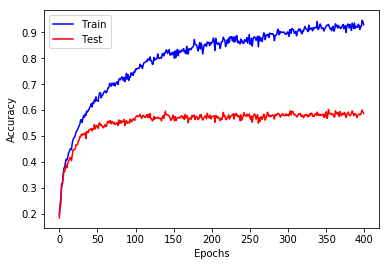

In [16]:
fig = plt.figure()
fig, ax = plt.subplots()
x_axe = np.arange(0,len(train_accuracy),1)
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy')
ax.plot(x_axe, train_accuracy, 'b', label = 'Train')
ax.plot(x_axe, test_accuracy, 'r', label = 'Test')
ax.legend()
fig.show()
fig.savefig("accuracy_red_3d.jpg", dpi = 300)


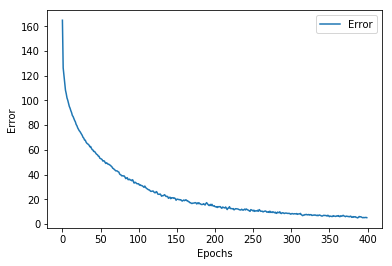

In [17]:
fig = plt.figure()
fig, ax = plt.subplots()
x_axe = np.arange(0,len(train_accuracy),1)
#ax = fig.add_axes([1,1,1,1])
ax.set_xlabel('Epochs')
ax.set_ylabel('Error')
ax.plot(x_axe, epoch_loss, label = 'Error')
fig.savefig("error_red_3d.png", dpi = 300)
ax.legend()


In [1]:
np.save("train_accu_VoxNet2", train_accuracy)
np.save("test_accu_VoxNet2", test_accuracy)
np.save("err_accu_VoxNet2", epoch_loss)

NameError: name 'np' is not defined